# Starting the Project
What question do I want to answer? _"What are the best recommendations I can make, learning from historical data to improve on future campaigns?"_

# Exploratory Data Analysis 
EDA is used to explore the target and features so we know if we will need to **transform or normalize** some of the features based on their distribution. 

**_Or delete some features since it might not give me any information in predicting future outcomes, or create new features that might be useful for prediction_**. 

## Basic EDA workflow
The basic workflow is as follows:

1. Clean the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
    
2. Explore properties. Use histograms, scatter plots, and aggregation functions to summarize the data.
    - Getting the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. 
3. Explore group properties. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Loading and Cleaning with Pandas

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import dask.dataframe as db
%matplotlib inline
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import glob

In [3]:
columns = [
 'Line Item Type',
 'Creative Type',
 'Date',
 'Time of Day',
 'Device Type',
 'Operating System',
 'Region',
 'City',
 'DV360 Activity',
 'Exchange',
 'App/URL',
 'Impressions',
 'Clicks',
 'Revenue (Adv Currency)',
 'Post-Click Conversions',
 'Post-View Conversions',
 'Active View: Viewable Impressions',
 'First-Quartile Views (Video)',
 'Third-Quartile Views (Video)',
 'Midpoint Views (Video)',
 'Complete Views (Video)',
 'Layer',
 'Channel',
 'Behaviour']

Tasks Completed Below:
- Creating a function to import files instantly without manually reading each file manually. 
- Also, getting rid of unknown values for Creative Column

In [450]:
'''

#Parsing dtype during reading csv is faster than using a for loop
dtype = {'Line Item Type':'category',
         'Creative Type':'category',
         'Device Type':'category',
         'Operating System':'category',
         'DV360 Activity':'category',
         'Exchange':'category',
         'Layer':'category',
         'Channel':'category',
         'Behaviour':'category',
         'Region':'category',
         'City':'category',
         'App/URL':'category'
        }

'''

"\n\n#Parsing dtype during reading csv is faster than using a for loop\ndtype = {'Line Item Type':'category',\n         'Creative Type':'category',\n         'Device Type':'category',\n         'Operating System':'category',\n         'DV360 Activity':'category',\n         'Exchange':'category',\n         'Layer':'category',\n         'Channel':'category',\n         'Behaviour':'category',\n         'Region':'category',\n         'City':'category',\n         'App/URL':'category'\n        }\n\n"

In [460]:
def import_file(file):
    '''
    This is a simple importing function where the input is the csv file and outputs the processed dataframe
    '''
    #Converting file argument to string in order to be read into csv
    file = str(file)
    
    #Reading into csv file 
    #Selecting data type manually to optimize memory (categorical dtypes)
    #Parsing dates
    df = pd.read_csv(file,usecols=columns,dtype=dtype,parse_dates=['Date'])
    
    #Selecting samples that isn't null
    df = df[df.notnull()]
    
    #Extracting elements from date columns
    #Creating month column 
    df['Month'] = pd.DatetimeIndex(df['Date']).month
    #Creating day column
    df['Day'] = pd.DatetimeIndex(df['Date']).day
    
    
    
    #Optimising data storage by selecting columns that has int datatype
    columns_to_convert = df.select_dtypes(include=['int64']).columns
    for i in columns_to_convert:        
        df[i] = df[i].astype('int8')  
    
    object_cols = df.select_dtypes(include=['object']).columns
    for col in object_cols:
        #Calculating how many unique values to decide to change to category column or not
        num_unique_values = len(df[col].unique())
        num_total_values = len(df[col])
        
        if num_unique_values / num_total_values < 0.5:
            df.loc[:,col] = df[col].astype('category')
        else:
            continue
        
    float_cols = df.select_dtypes(include=['float64']).columns
    for i in float_cols:
        df[i] = df[i].astype('int8') 
        

    return df

df = import_file("DataFile-chunk_0.csv")

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
Advertiser ID                        1000000 non-null int8
Line Item Type                       1000000 non-null category
Creative Type                        1000000 non-null category
Date                                 1000000 non-null datetime64[ns]
Time of Day                          1000000 non-null int8
Device Type                          1000000 non-null category
Operating System                     1000000 non-null category
Region                               1000000 non-null category
City                                 1000000 non-null category
DV360 Activity                       1000000 non-null category
Exchange                             1000000 non-null category
App/URL                              1000000 non-null category
Impressions                          1000000 non-null int8
Clicks                               1000000 non-null int8
Revenue (Adv Cur

In [462]:
df.head(50)

,Advertiser ID,Line Item Type,Creative Type,Date,Time of Day,Device Type,Operating System,Region,City,DV360 Activity,Exchange,App/URL,Impressions,Clicks,Revenue (Adv Currency),Post-Click Conversions,Post-View Conversions,Active View: Viewable Impressions,First-Quartile Views (Video),Third-Quartile Views (Video),Midpoint Views (Video),Complete Views (Video),Layer,Channel,Behaviour,Month,Day
0,0,Real-time bidding,Standard,2018-10-25,16,Desktop,Macintosh,New South Wales,Sydney,Total,PubMatic,mail.yahoo.com,4,0,0,0,0,2,0,0,0,0,AW,D,PT,10,25
1,0,Real-time bidding,Standard,2018-10-25,16,Desktop,Windows 10,New South Wales,Sydney,Total,Rubicon,independent.co.uk,1,0,0,0,0,0,0,0,0,0,AW,D,PT,10,25
2,0,Real-time bidding,Standard,2018-10-25,17,Desktop,Macintosh,New South Wales,Sydney,Total,DoubleClick Ad Exchange,nfl.com,1,0,0,0,0,1,0,0,0,0,AW,D,PT,10,25
3,0,Real-time bidding,Standard,2018-10-25,17,Desktop,Windows 10,New South Wales,Sydney,Total,DoubleClick Ad Exchange,allrecipes.com,2,0,0,0,0,2,0,0,0,0,AW,D,PT,10,25
4,0,Real-time bidding,Standard,2018-10-25,17,Desktop,Windows 10,New South Wales,Sydney,Total,DoubleClick Ad Exchange,linkedin.com,8,0,0,0,0,6,0,0,0,0,AW,D,PT,10,25
5,0,Real-time bidding,Standard,2018-10-25,17,Desktop,Windows 8,New South Wales,Sydney,Total,PubMatic,mail.yahoo.com,2,0,0,0,0,1,0,0,0,0,AW,D,PT,10,25
6,0,Real-time bidding,Standard,2018-10-25,18,Desktop,Windows 8,New South Wales,Sydney,Total,Rubicon,mail.yahoo.com,1,0,0,0,0,0,0,0,0,0,AW,D,PT,10,25
7,0,Real-time bidding,Standard,2018-10-25,20,Desktop,Windows 8,New South Wales,Sydney,Total,DoubleClick Ad Exchange,inquirer.net,1,0,0,0,0,1,0,0,0,0,AW,D,PT,10,25
8,0,Real-time bidding,Standard,2018-10-25,20,Smart Phone,Android 8.0,New South Wales,Sydney,Total,DoubleClick Ad Exchange,theguardian.com/technology,1,0,0,0,0,1,0,0,0,0,AW,D,PT,10,25
9,0,Real-time bidding,Standard,2018-10-25,21,Desktop,Windows 10,New South Wales,Central Coast,Total,Rubicon,howstuffworks.com,1,0,0,0,0,1,0,0,0,0,AW,D,PT,10,25


In [454]:
#Storing final data types of every column in a dictionary with keys for column names
#So I can use the dtype parameters that accept dictionaries 
#Since parsing dtype into read_csv is quicker than using forloops

dtypes = df.dtypes
dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_dtypes = dict(zip(dtypes_col,dtypes_type))

#This is perfect so I can use 'column_dtypes' next time I want to build
#another dataframe quickly 
column_dtypes

{'Advertiser ID': 'int8',
 'Line Item Type': 'category',
 'Creative Type': 'category',
 'Date': 'datetime64[ns]',
 'Time of Day': 'int8',
 'Device Type': 'category',
 'Operating System': 'category',
 'Region': 'category',
 'City': 'category',
 'DV360 Activity': 'category',
 'Exchange': 'category',
 'App/URL': 'category',
 'Impressions': 'int8',
 'Clicks': 'int8',
 'Revenue (Adv Currency)': 'int8',
 'Post-Click Conversions': 'int8',
 'Post-View Conversions': 'int8',
 'Active View: Viewable Impressions': 'int8',
 'First-Quartile Views (Video)': 'int8',
 'Third-Quartile Views (Video)': 'int8',
 'Midpoint Views (Video)': 'int8',
 'Complete Views (Video)': 'int8',
 'Layer': 'category',
 'Channel': 'category',
 'Behaviour': 'category',
 'Year': 'int8',
 'Month': 'int8',
 'Day': 'int8'}

In [316]:
print("The length of the dataset after deleting null values: ",len(df))
df.head(10)

The length of the dataset after deleting null values:  1000000


,Advertiser ID,Line Item Type,Creative Type,Date,Time of Day,Device Type,Operating System,Region,City,DV360 Activity,Exchange,App/URL,Impressions,Clicks,Revenue (Adv Currency),Post-Click Conversions,Post-View Conversions,Active View: Viewable Impressions,First-Quartile Views (Video),Third-Quartile Views (Video),Midpoint Views (Video),Complete Views (Video),Layer,Channel,Behaviour,Year,Month,Day
0,0,Real-time bidding,Standard,2018-10-25,16,Desktop,Macintosh,New South Wales,Sydney,Total,PubMatic,mail.yahoo.com,4,0,0.015509,0.0,0.0,2,0,0,0,0,AW,D,PT,-30,10,25
1,0,Real-time bidding,Standard,2018-10-25,16,Desktop,Windows 10,New South Wales,Sydney,Total,Rubicon,independent.co.uk,1,0,0.006772,0.0,0.0,0,0,0,0,0,AW,D,PT,-30,10,25
2,0,Real-time bidding,Standard,2018-10-25,17,Desktop,Macintosh,New South Wales,Sydney,Total,DoubleClick Ad Exchange,nfl.com,1,0,0.007226,0.0,0.0,1,0,0,0,0,AW,D,PT,-30,10,25
3,0,Real-time bidding,Standard,2018-10-25,17,Desktop,Windows 10,New South Wales,Sydney,Total,DoubleClick Ad Exchange,allrecipes.com,2,0,0.011810,0.0,0.0,2,0,0,0,0,AW,D,PT,-30,10,25
4,0,Real-time bidding,Standard,2018-10-25,17,Desktop,Windows 10,New South Wales,Sydney,Total,DoubleClick Ad Exchange,linkedin.com,8,0,0.043227,0.0,0.0,6,0,0,0,0,AW,D,PT,-30,10,25
5,0,Real-time bidding,Standard,2018-10-25,17,Desktop,Windows 8,New South Wales,Sydney,Total,PubMatic,mail.yahoo.com,2,0,0.008338,0.0,0.0,1,0,0,0,0,AW,D,PT,-30,10,25
6,0,Real-time bidding,Standard,2018-10-25,18,Desktop,Windows 8,New South Wales,Sydney,Total,Rubicon,mail.yahoo.com,1,0,0.003684,0.0,0.0,0,0,0,0,0,AW,D,PT,-30,10,25
7,0,Real-time bidding,Standard,2018-10-25,20,Desktop,Windows 8,New South Wales,Sydney,Total,DoubleClick Ad Exchange,inquirer.net,1,0,0.003607,0.0,0.0,1,0,0,0,0,AW,D,PT,-30,10,25
8,0,Real-time bidding,Standard,2018-10-25,20,Smart Phone,Android 8.0,New South Wales,Sydney,Total,DoubleClick Ad Exchange,theguardian.com/technology,1,0,0.006779,0.0,0.0,1,0,0,0,0,AW,D,PT,-30,10,25
9,0,Real-time bidding,Standard,2018-10-25,21,Desktop,Windows 10,New South Wales,Central Coast,Total,Rubicon,howstuffworks.com,1,0,0.003611,0.0,0.0,1,0,0,0,0,AW,D,PT,-30,10,25


Tasks Completed Below:
- Optimising memory storage. 
- Specified memory_usage argument since True value specifies whether total memory usage of Dataframe \
    elements (including index) is displayed. True shows memory usage. Didn't do 'deep memory introspection' even \
    though it shows a real memory usage calculation but it performs at the cost of computational resources
 
```python
#Before changing data types objects to category
data.info(memory_usage='deep')
#Memory usage: 756.5 MB
data['Creative Type'] = data['Creative Type'].astype('category')
#Memory usage: 709.3 MB
```
Hence, this demonstration shows I need to convert objects that consists of few different values into category dtypes

**Memory went from 700-800mbs down to 170mb.**

In [295]:
# Rewrite the Operating System column
def rewrite_os(string):
    """
    Rewriting the operating system since it had way too many values
    """
    if string == 'Macintosh' or string == 'Windows 10':
        pass
    elif string.startswith('iOS'):
        string = 'iOS'
    elif string.startswith('Android'):
        string = 'Android'
    elif string.startswith('Windows Phone'):
        string = 'Windows Phone OS'
    elif string.startswith('Windows'):
        string = 'Windows (Earlier Versions)'
    else:
        string = 'Other'
    return string

#Changing data type to category for operating system
df['Operating System'] = df['Operating System'].apply(lambda x: rewrite_os(x)).astype('category')

### Cleaning: Examining the DataFrame - Quick Checks 
Trying to examine the dataframe to get overall sense of the content

The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [455]:
df.describe()

,Advertiser ID,Time of Day,Impressions,Clicks,Revenue (Adv Currency),Post-Click Conversions,Post-View Conversions,Active View: Viewable Impressions,First-Quartile Views (Video),Third-Quartile Views (Video),Midpoint Views (Video),Complete Views (Video),Year,Month,Day
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,-0.599317,13.452744,1.868314,0.003157,0.001978,0.000263,0.002366,1.209503,0.311752,0.241643,0.269645,0.218413,-29.769756,7.051655,16.210771
std,89.539558,5.583851,3.989541,0.083421,0.190227,0.019155,0.058723,3.104109,1.821529,1.678938,1.743712,1.618932,0.420989,3.614434,8.654108
min,-127.000000,0.000000,-128.000000,0.000000,0.000000,0.000000,0.000000,-128.000000,-128.000000,-128.000000,-128.000000,-128.000000,-30.000000,1.000000,1.000000
25%,-90.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.000000,5.000000,9.000000
50%,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-30.000000,7.000000,16.000000
75%,95.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-30.000000,10.000000,24.000000
max,123.000000,23.000000,127.000000,45.000000,82.000000,8.000000,10.000000,127.000000,127.000000,127.000000,127.000000,127.000000,-29.000000,12.000000,31.000000


### Shape of Dataset
Checking the dimensions of the table to see each row representing an observation and each column representing the information (variable). 

In [318]:
print("The number of rows in this dataset is: {}".format(data.shape[0]))
print("The number of feature/columns in this dataset is: {}".format(data.shape[1]))
print('\n')
print("Columns in this data are: ", df.columns.tolist())

The number of rows in this dataset is: 1000000
The number of feature/columns in this dataset is: 28


Columns in this data are:  ['Advertiser ID', 'Line Item Type', 'Creative Type', 'Date', 'Time of Day', 'Device Type', 'Operating System', 'Region', 'City', 'DV360 Activity', 'Exchange', 'App/URL', 'Impressions', 'Clicks', 'Revenue (Adv Currency)', 'Post-Click Conversions', 'Post-View Conversions', 'Active View: Viewable Impressions', 'First-Quartile Views (Video)', 'Third-Quartile Views (Video)', 'Midpoint Views (Video)', 'Complete Views (Video)', 'Layer', 'Channel', 'Behaviour', 'Year', 'Month', 'Day']


### Cleaning: Examining the Dataframe - Deeper Look
Checking to see if there are any missing values in the dataframe. 

As seen below, I tried to convert to the type I expect the column to be but something went horribly wrong meaning my data is bad as seen below

In [298]:
#no missing values
np.sum(df.isnull())

Advertiser ID                        0
Line Item Type                       0
Creative Type                        0
Date                                 0
Time of Day                          0
Device Type                          0
Operating System                     0
Region                               0
City                                 0
DV360 Activity                       0
Exchange                             0
App/URL                              0
Impressions                          0
Clicks                               0
Revenue (Adv Currency)               0
Post-Click Conversions               0
Post-View Conversions                0
Active View: Viewable Impressions    0
First-Quartile Views (Video)         0
Third-Quartile Views (Video)         0
Midpoint Views (Video)               0
Complete Views (Video)               0
Layer                                0
Channel                              0
Behaviour                            0
dtype: int64

## Categorical Plots
Doing this to understand different conversions on a superficial basis before diving in subsetting dataframes to get a deep look of how different categories influence metrics.

Text(0.5,1,'Average Active Views for Different Device Types')

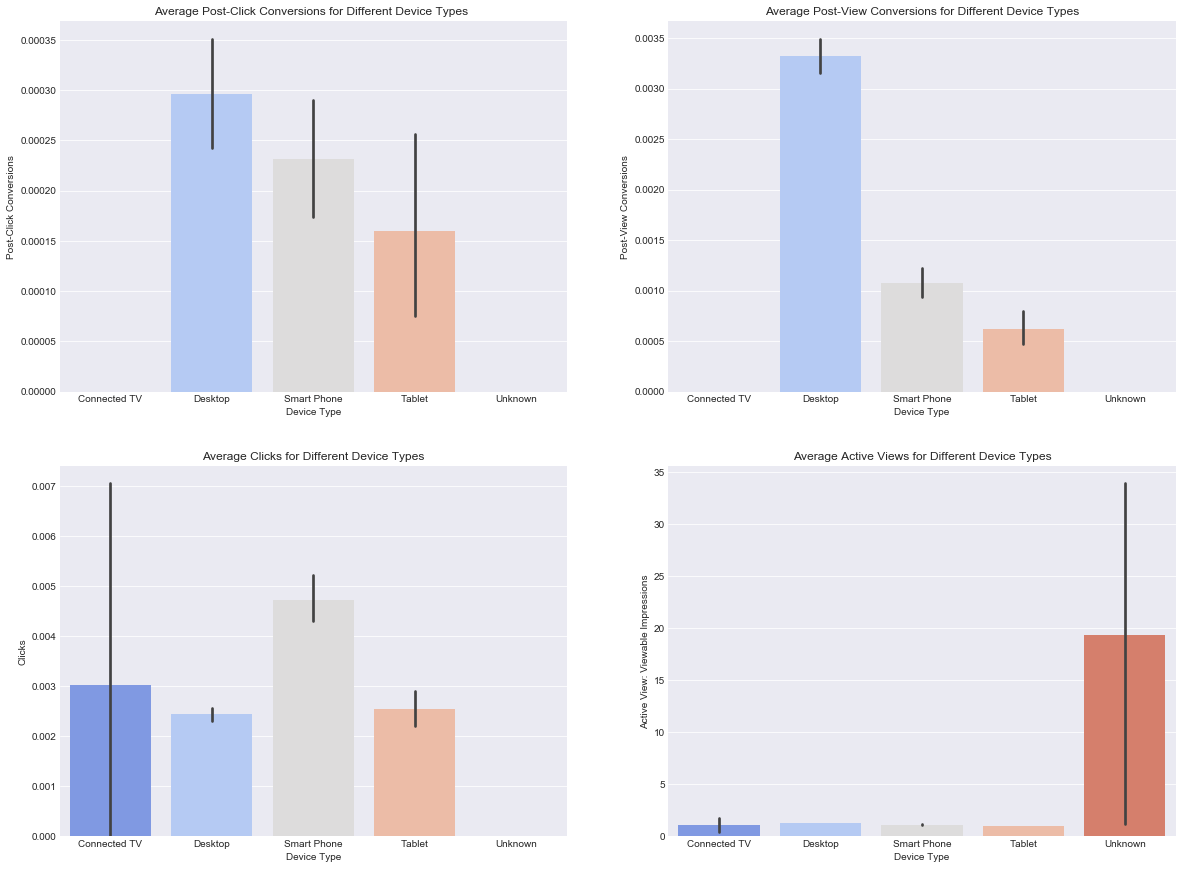

In [299]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,15))

sns.barplot(x='Device Type', y='Post-Click Conversions', data=df, 
            palette='coolwarm',ax=ax[0][0]).set_title("Average Post-Click Conversions for Different Device Types ")
sns.barplot(x='Device Type', y='Post-View Conversions', data=df, 
            palette='coolwarm',ax=ax[0][1]).set_title("Average Post-View Conversions for Different Device Types")
sns.barplot(x='Device Type',y='Clicks',data=df,
           palette='coolwarm',ax=ax[1][0]).set_title("Average Clicks for Different Device Types")
sns.barplot(x='Device Type',y='Active View: Viewable Impressions',data=df,
            palette='coolwarm',ax=ax[1][1]).set_title("Average Active Views for Different Device Types")

**Notes:**
- Android and Windows 10 have the highest average conversion rates, followed by other earlier versions of Windows, the Macintosh system and iOS.
- This seems to suggest that more ads could be displayed on the Windows system and less on the Macintosh/iOS to improve the customer conversion rates.

Text(0.5,1,'Digital Spend Across OS')

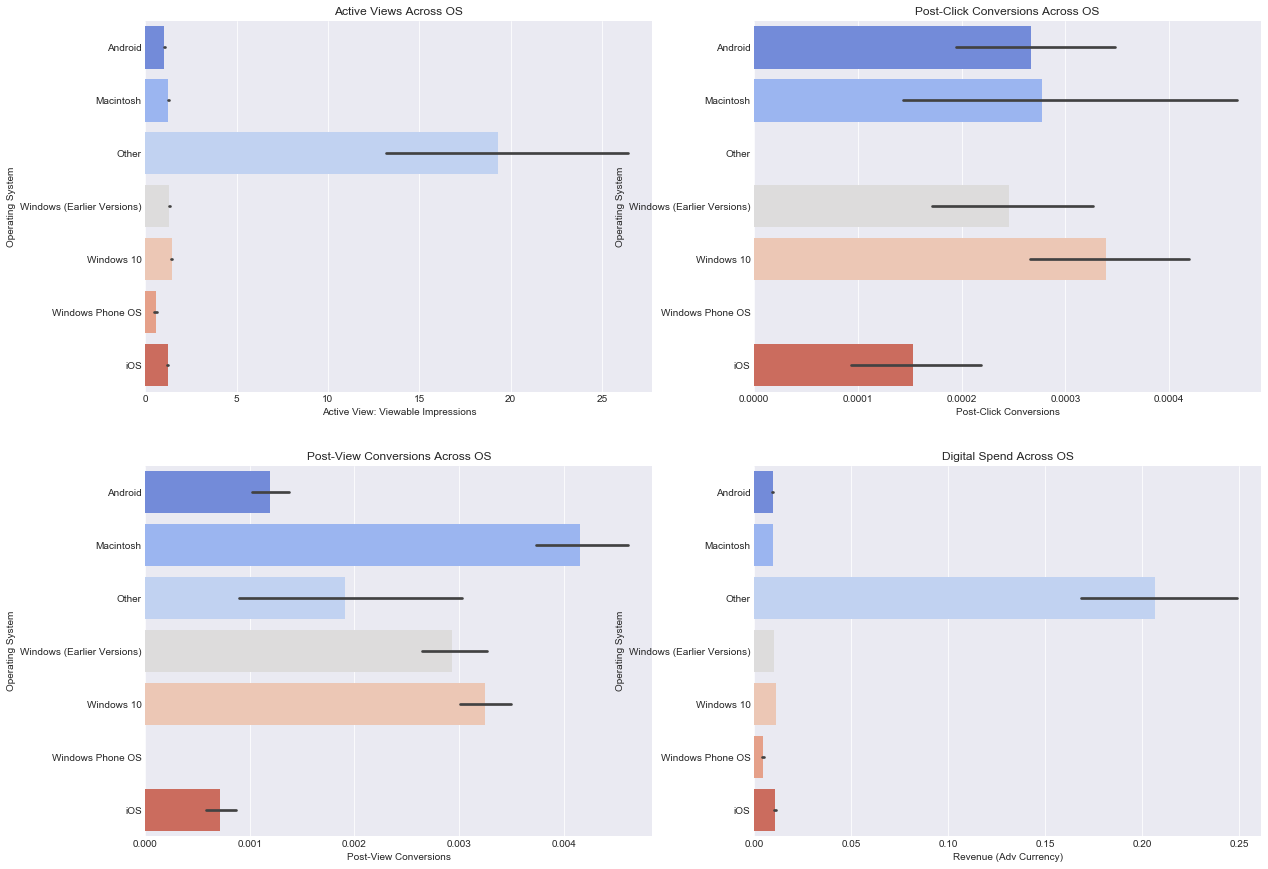

In [300]:
fig,ax = plt.subplots(figsize=(20,15),nrows=2,ncols=2)
sns.barplot(x='Active View: Viewable Impressions', y='Operating System', 
            data=data, palette='coolwarm',ax=ax[0][0]).set_title("Active Views Across OS")

sns.barplot(x='Post-Click Conversions',y='Operating System',data=data,
           palette='coolwarm',ax=ax[0][1]).set_title("Post-Click Conversions Across OS")

sns.barplot(x='Post-View Conversions',y='Operating System',data=data,
           palette='coolwarm',ax=ax[1][0]).set_title("Post-View Conversions Across OS")

sns.barplot(x='Revenue (Adv Currency)',y='Operating System',data=data,
           palette='coolwarm',ax=ax[1][1]).set_title("Digital Spend Across OS")

### Comparison of Channels on Spend vs Conversions

Would like to see which channel and their associated spend ratios and do a comparison plot to see how much conversions each channels are getting.

Looks like spend is very concentrated and high for `V` and `T` compared to the rest however it looks like `D`, `V` and `N` channels are getting the most conversions. Probably, these plots give some insight putting less budget into less-converted channels and more into converted-channels. 

#### Awareness Channel
The `V` channel is excellent in putting more money to raise awareness about the advertising products. 

Text(0.5,1,'Active Views Across Different Channels')

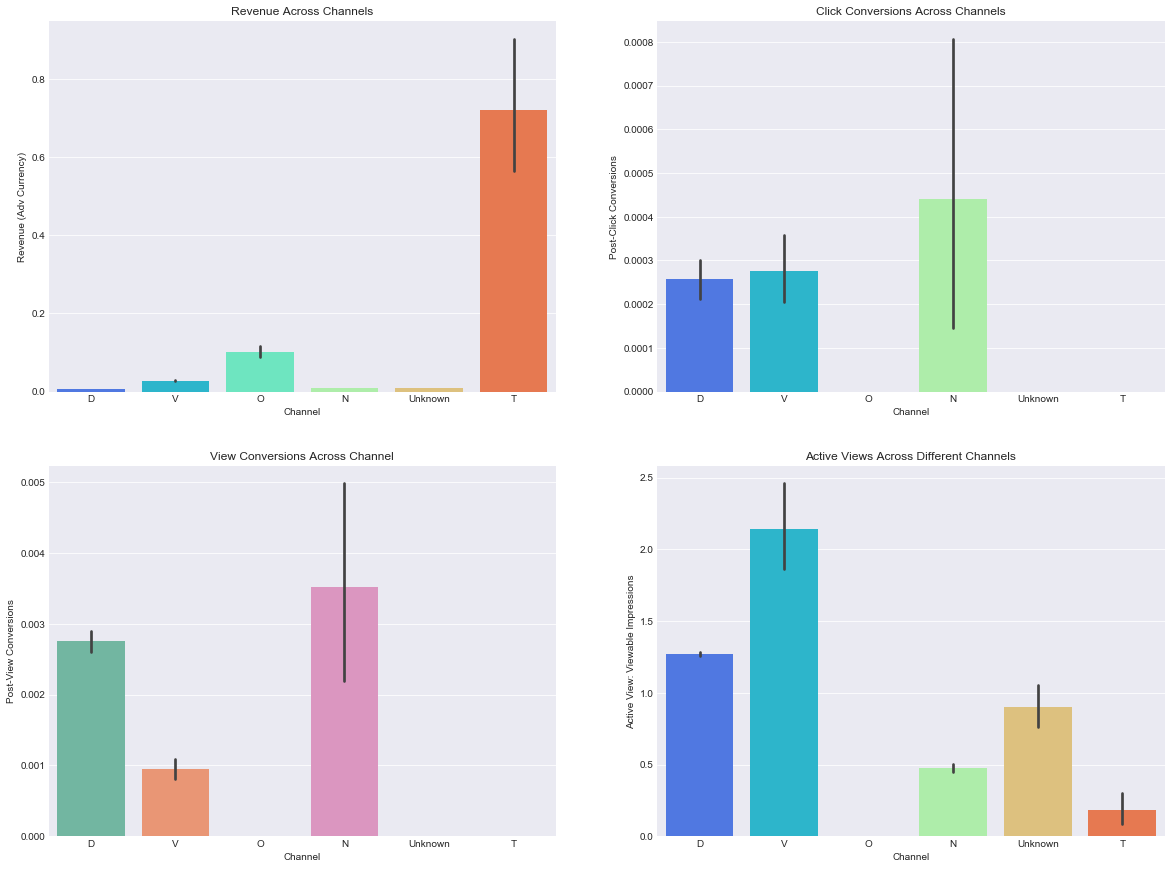

In [301]:
fig,ax = plt.subplots(figsize=(20,15),nrows=2,ncols=2)

#Finding how much money is spent per channel
sns.barplot(x='Channel',y='Revenue (Adv Currency)',data=data,
            palette='rainbow',ax=ax[0][0]).set_title("Revenue Across Channels")

sns.barplot(x='Channel',y='Post-Click Conversions',
            data=data,palette='rainbow',ax=ax[0][1]).set_title("Click Conversions Across Channels")

sns.barplot(x='Channel',y='Post-View Conversions',
            data=data,palette='Set2',ax=ax[1][0]).set_title("View Conversions Across Channel")

sns.barplot(x='Channel',y='Active View: Viewable Impressions',
            data=data,palette='rainbow',ax=ax[1][1]).set_title("Active Views Across Different Channels")


## Distribution of Variables
What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?
- Make **HISTOGRAMS FOR NUMERICAL VARIABLES** and **BARPLOTS FOR CATEGORICAL VARIABLES**. 
- Check for missing values for the variables by looking at the **count** row and comparing it to **data.shape**. 

### Extracting Features from Date Column

In [325]:
#Extracting elements from date columns
df['Year'] = pd.DatetimeIndex(df['Date']).year
#Creating month column 
df['Month'] = pd.DatetimeIndex(df['Date']).month
#Creating day column
df['Day'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Advertiser ID,Line Item Type,Creative Type,Date,Time of Day,Device Type,Operating System,Region,City,DV360 Activity,Exchange,App/URL,Impressions,Clicks,Revenue (Adv Currency),Post-Click Conversions,Post-View Conversions,Active View: Viewable Impressions,First-Quartile Views (Video),Third-Quartile Views (Video),Midpoint Views (Video),Complete Views (Video),Layer,Channel,Behaviour,Year,Month,Day
0,0,Real-time bidding,Standard,2018-10-25,16,Desktop,Macintosh,New South Wales,Sydney,Total,PubMatic,mail.yahoo.com,4,0,0.015509,0.0,0.0,2,0,0,0,0,AW,D,PT,2018,10,25
1,0,Real-time bidding,Standard,2018-10-25,16,Desktop,Windows 10,New South Wales,Sydney,Total,Rubicon,independent.co.uk,1,0,0.006772,0.0,0.0,0,0,0,0,0,AW,D,PT,2018,10,25
2,0,Real-time bidding,Standard,2018-10-25,17,Desktop,Macintosh,New South Wales,Sydney,Total,DoubleClick Ad Exchange,nfl.com,1,0,0.007226,0.0,0.0,1,0,0,0,0,AW,D,PT,2018,10,25
3,0,Real-time bidding,Standard,2018-10-25,17,Desktop,Windows 10,New South Wales,Sydney,Total,DoubleClick Ad Exchange,allrecipes.com,2,0,0.011810,0.0,0.0,2,0,0,0,0,AW,D,PT,2018,10,25
4,0,Real-time bidding,Standard,2018-10-25,17,Desktop,Windows 10,New South Wales,Sydney,Total,DoubleClick Ad Exchange,linkedin.com,8,0,0.043227,0.0,0.0,6,0,0,0,0,AW,D,PT,2018,10,25


## Further Data Analysis

Created a function taking specific columns from all the files.
- Filtering dataframe from a specific layer and observing the dimensions and how it affects metrics (CPA, Active Views, App/URL etc.)
    - **How does CPA change through different websites?**
    - Investigating each specific layer and how it affects CPA basically 
    - Looking at the data and how it influences the views, the conversions i.e. the metrics and thus look at the information regarding that causes the spikes.

- Create function taking multiple specific columns and multiple files 

In [6]:
#Importing multiple csv files into pandas and concatenate into one dataframe
#All csv files have same columns

def concat_frame(columns,dtype,parse_dates):
    path = r"C:\Users\William X Nguyen\Desktop\Chunks_0-9"
    all_files = glob.glob(path + "/*.csv")

    list=[]
    for filename in all_files:
        dataframe = pd.read_csv(filename,index_col=None,dtype=dtype,
                         usecols=columns,header=0,parse_dates=parse_dates) 
        #'header=0', first row can be assigned as the column names
        list.append(dataframe)
    
    dataframe = pd.concat(list,axis=0,ignore_index=True)
    
    #object_cols = dataframe.select_dtypes(include['object'],)
    
    return dataframe

In [469]:
#Columns that I want to create from multiple files
columns = ['Layer','Active View: Viewable Impressions',
          'Post-Click Conversions','Post-View Conversions',
          'Channel','App/URL','Date']

dtype = {'Active View: Viewable Impressions':'int8',
         'Post-Click Conversions':'int8',
         'Post-View Conversions':'int8',
}

dataframe = concat_frame(columns,dtype,'Date')

In [472]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 7 columns):
Date                                 datetime64[ns]
App/URL                              object
Post-Click Conversions               int8
Post-View Conversions                int8
Active View: Viewable Impressions    int8
Layer                                object
Channel                              object
dtypes: datetime64[ns](1), int8(3), object(3)
memory usage: 333.8+ MB


In [473]:
#Optimising data storage by selecting columns that has category dtypes
columns_to_convert = dataframe.select_dtypes(include=['object']).columns
for i in columns_to_convert:
    dataframe[i] = dataframe[i].astype('category')

In [474]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 7 columns):
Date                                 datetime64[ns]
App/URL                              category
Post-Click Conversions               int8
Post-View Conversions                int8
Active View: Viewable Impressions    int8
Layer                                category
Channel                              category
dtypes: category(3), datetime64[ns](1), int8(3)
memory usage: 165.0 MB


In [475]:
dataframe_aw = dataframe[dataframe['Layer']=='AW']
dataframe_aw.head()

,Date,App/URL,Post-Click Conversions,Post-View Conversions,Active View: Viewable Impressions,Layer,Channel
0,2018-10-25,mail.yahoo.com,0,0,2,AW,D
1,2018-10-25,independent.co.uk,0,0,0,AW,D
2,2018-10-25,nfl.com,0,0,1,AW,D
3,2018-10-25,allrecipes.com,0,0,2,AW,D
4,2018-10-25,linkedin.com,0,0,6,AW,D


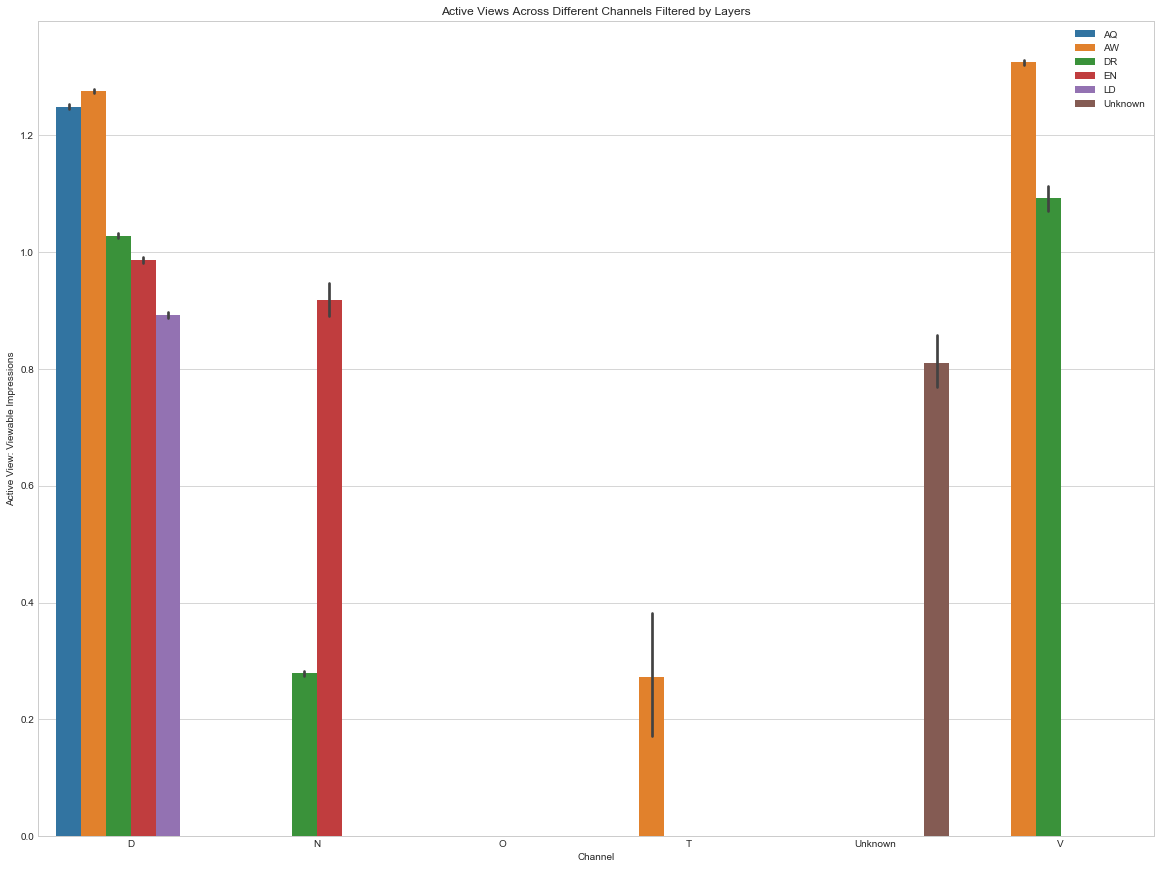

In [478]:
plt.figure(figsize=(20,15))
sns.set_style(style='whitegrid')

sns.barplot(x='Channel',y='Active View: Viewable Impressions',
               hue='Layer',data=dataframe).set_title("Active Views Across Different Channels Filtered by Layers")

plt.legend(loc='best')

In [7]:
columns = ['Active View: Viewable Impressions',
          'Creative Type','Layer']

dtype = {'Active View: Viewable Impressions':'int8',
        'Creative Type':'category',
         'Layer':'category'}

dataframe2 = concat_frame(columns,dtype,None)


In [8]:
dataframe2.head()

,Creative Type,Active View: Viewable Impressions,Layer
0,Standard,2,AW
1,Standard,0,AW
2,Standard,1,AW
3,Standard,2,AW
4,Standard,6,AW


In [ ]:
nrows = 2

fig,ax=plt.subplots(figsize=(20,15),nrows=2,ncols=int(dataframe2['Layer'].nunique()/nrows),squeeze=False)
#Squeeze argument forces to always return a "Rows x Cols" array with axes
#even if its a single one. 


layer_values = dataframe2['Layer'].unique().tolist()


i=0
#Does the creative type affect conversions and views/CPA throughout different layers? 
for layer in layer_values[:3]:
        sns.barplot(x='Creative Type',y='Active View: Viewable Impressions',
                data=dataframe2[dataframe2['Layer']==layer],ax=ax[0][i]).set_title(layer)
        plt.xticks(rotation=90)

        i+=1

i=0
for layer in layer_values[3:]:
        sns.barplot(x='Creative Type',y='Active View: Viewable Impressions',
                data=dataframe2[dataframe2['Layer']==layer],ax=ax[1][i]).set_title(layer)
        plt.xticks(rotation=90)
        i+=1

plt.legend(loc='best')


In [11]:
dataframe2.head()
#dataframe2_aq['Creative Type'].value_counts()

,Creative Type,Active View: Viewable Impressions,Layer
0,Standard,2,AW
1,Standard,0,AW
2,Standard,1,AW
3,Standard,2,AW
4,Standard,6,AW


## Questions to Ask
**Investigation**:
- (Metrics Report)[https://support.google.com/displayvideo/table/3187025?hl=en&ref_topic=6071464&fbclid=IwAR2iVuJN4ziBotuSjyRD4d_6yhlWbX4SUjd9ahQkfK62B76TOQvAE4xRsfg]
* What city/region gets the most active viewable impressions?
* Which device type do they use depending on the region?
* Examples of actionable insight: Should we invest more money into desktop display ads for WA, compared to sydney people who use their phones all the time?
- **Aggregate data on a monthly basis through many files and visualize on graph to see conversions through time**.
     - **What information was present when sales were great compared to when sales were low.**
     
**Investigate:**
- Seeing how conversions/active views CHANGE through through different layers for a specific dimensions
- For example: Which websites get the most views and how does metrics change throughout the layers? 
- Does the creative type affect conversions and views/CPA throughout different layers? 

**Visualization Ideas:**
- Seaborn strip plot [strip plot](https://seaborn.pydata.org/generated/seaborn.stripplot.html)
- Categorical scatterplots [link](https://seaborn.pydata.org/tutorial/categorical.html)
- EDA with seaborn [link](https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d)

